# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [2]:
import pandas as pd

# load the training dataset
data = pd.read_csv('/content/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [12]:
data.shape

(414, 7)

In [15]:
data.columns


Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit'],
      dtype='object')

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_date,414.0,2013.148971,0.281967,2012.66700,2012.917000,2013.16700,2013.417000,2013.58300
house_age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
transit_distance,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
local_convenience_stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
price_per_unit,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


 Checking for null values

In [8]:
# Your code to explore data and train a regression model
data.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

Correlation between the various features

In [9]:
data.corr()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
transaction_date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
house_age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
transit_distance,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
local_convenience_stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
price_per_unit,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


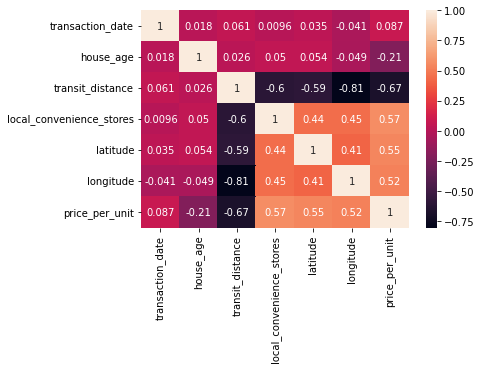

In [11]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

Split data

In [20]:
X=data[['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude']]
y=data['price_per_unit']

In [23]:
from sklearn.model_selection import train_test_split
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


Training Set: 289 rows
Test Set: 125 rows


Train model

In [24]:
# Linear Regression
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [25]:
# predicting
import numpy as np
pred=linear.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(pred)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [41. 13. 42. 13. 43. 40. 41. 34. 50. 46.]
Actual labels   :  356    45.3
170    14.4
224    46.0
331    15.6
306    50.2
325    38.1
150    48.5
10     41.4
21     51.6
268    40.1
Name: price_per_unit, dtype: float64


In [26]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, pred)
print("R2:", r2)

MSE: 71.58131577257258
RMSE: 8.460574198751086
R2: 0.579981565457663


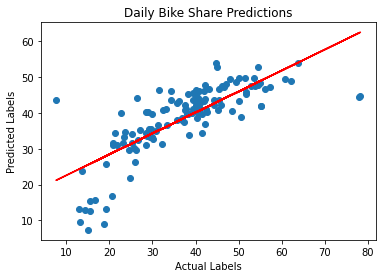

In [28]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

Saving model

In [32]:
import joblib
# Save the model as a pickle file
filename = '/content/real_estate_linear.pkl'
joblib.dump(linear, filename)

['/content/real_estate_linear.pkl']

In [39]:
# Loading the model from the file
loaded_model = joblib.load(filename)

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [38]:
# forcasting for new above
X_new = np.array([[2013.167,16.2,289.3248,5,24.98203,121.54348],
                  [2013.000,13.6,4082.015,0,24.94155,121.50381]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('The price for unit 1 and 2 are shown respectively below')
for prediction in results:
    print( np.round(prediction))

The price for unit 1 and 2 are shown respectively below
46.0
15.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Lasso model

Lasso() 

MSE: 78.56402072588622
RMSE: 8.863634735585974
R2: 0.5390090746378506


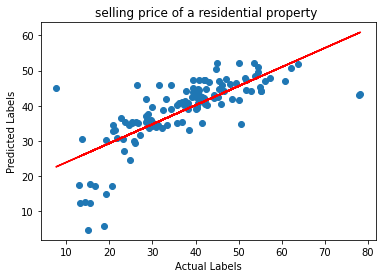

In [29]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
lass = Lasso().fit(X_train, y_train)
print (lass, "\n")

# Evaluate the model using the test data
preds = lass.predict(X_test)
mse = mean_squared_error(y_test, preds)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, preds)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, preds)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('selling price of a residential property ')
# overlay the regression line
z = np.polyfit(y_test, preds, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

In [ ]:
import joblib
# Save the model as a pickle file
filename = '/content/real_estate_linear.pkl'
joblib.dump(linear, filename)